# Natural Language Processing Workshop :

## Analyzing wine descriptions, rating, variety and price



download Kaggle dataset: https://www.kaggle.com/zynicide/wine-reviews

### 1: Getting Started : Importing & cleaning data


In [1]:
import pandas as pd

In [2]:
# Reading the data
wine_reviews = pd.read_csv("wine-reviews/winemag-data-130k-v2.csv")


In [3]:
# Check how large is our dataframe 
wine_reviews.shape

(129971, 14)

In [4]:
#checking the first five rows
wine_reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
#checking the last five rows
wine_reviews.iloc[-5:]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In [6]:
#Data cleaning
#drop columns designation, region1, region2 and taster details.
reviews = wine_reviews.drop(columns=['designation','region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'winery', ])
reviews.head()

,Unnamed: 0,country,description,points,price,province,title,variety
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red
2,2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling
4,4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir


In [7]:
#drop duplicate description
wine_df = reviews.drop_duplicates('description')

In [8]:
#drop rows with NaN price value
wine_df = wine_df.dropna(subset=['price'])
wine_df.shape

(111567, 8)

In [9]:
# Extra : cleaning the desciption, bag of words

### Part 2: Visualization & feature selection

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

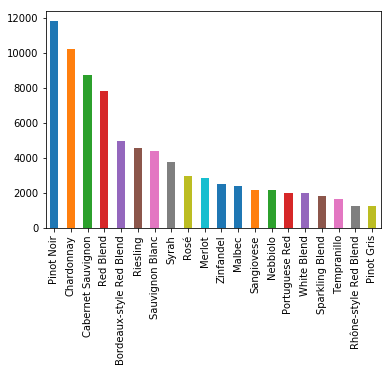

In [11]:
wine_df['variety'].value_counts().head(20).plot.bar()



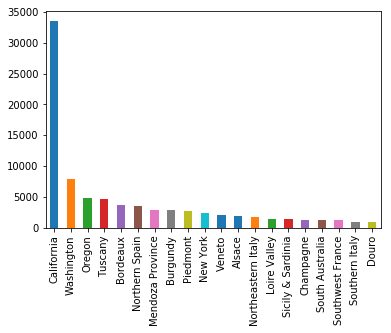

In [12]:
wine_df['province'].value_counts().head(20).plot.bar()

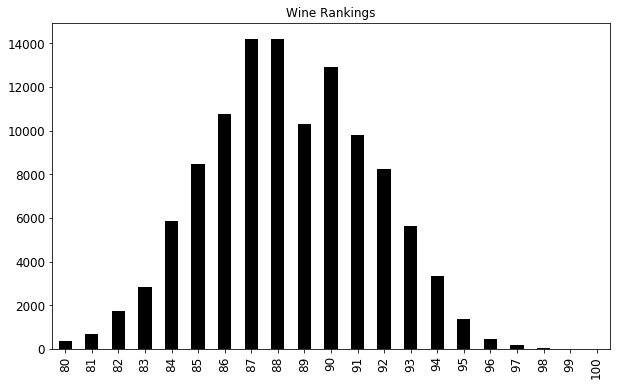

In [13]:
# Every wine gets a score between 80 and 100
wine_df['points'].value_counts().sort_index().plot.bar(
    figsize=(10, 6),
    color='black',
    fontsize=12,
    title='Wine Rankings',
)

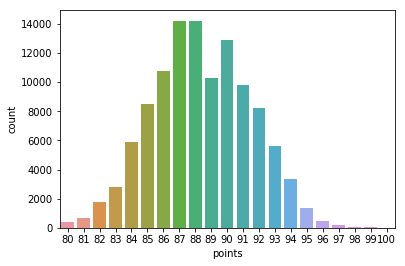

In [25]:
# With seaborn
sns.countplot(wine_df['points'])

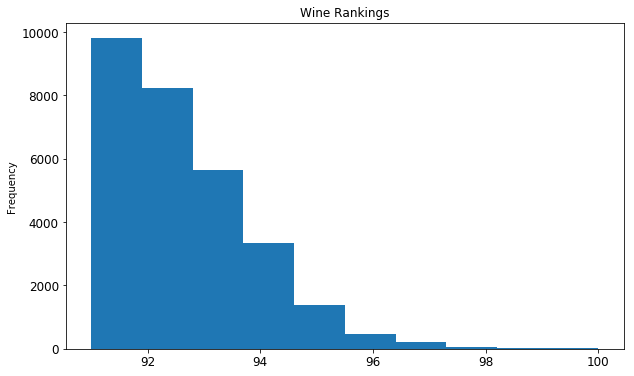

In [16]:
# Histogram
wine_df[wine_df['points'] > 90]['points'].plot.hist(
    figsize=(10, 6),
    fontsize=12,
    title='Wine Rankings',
)

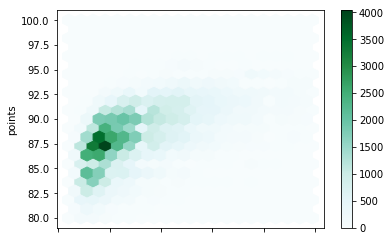

In [17]:
# Hexplot
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=20)

In [30]:
from plotly.offline import init_notebook_mode, iplot
df = reviews['country'].replace("US", "United States").value_counts()

iplot([go.Choropleth(
    locationmode='country names',
    locations=df.index.values,
    text=df.index,
    z=df.values
)])

NameError: name 'go' is not defined